In [1]:
# Import relevant packages
import gurobipy as gp                 # Gurobi Python API
from gurobipy import GRB              # Gurobi constants (e.g., GRB.MAXIMIZE)

import pandas as pd                   # DataFrames
import matplotlib.pyplot as plt       # Plotting
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import numpy as np                    # Numerical operations (similar to Julia base)

import warnings
warnings.filterwarnings("ignore", message=".*All values for SymLogScale are below linthresh.*")

In [2]:
# Import auxiliary functions
from functions_data import *
from functions_model import *
from functions_plots import *
from functions_policy import *

In [3]:
from main import main

In [4]:
# --- Define scenario space ---
seasons = ['Winter', 'Summer', 'LowLoad']
player_counts = [2]

# --- Fixed storage capacity ---
storage_capacity = None

# --- Store results ---
results = {}

SAVE_FIGS = True

# BASE CASE - Analysis for 2 players


### Storage characteristics

| Season | Installed Capacity |
| --- | --- |
| Winter | 6330.0 |
| Summer | 11,520.0 |
| Low Load | 9,140.0 |

Running Winter - 2 players
  Player   OC   Eta   E_max   Q_max  \
0      A  0.5  0.85  2110.0  1056.0   
1      B  0.5  0.85  4220.0  2112.0   

                                             Q_steps  
0  [0.0, 105.6, 211.2, 316.8, 422.4, 528.0, 633.6...  
1  [0.0, 211.2, 422.4, 633.6, 844.8, 1056.0, 1267...  
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-28
Optimization was successful. It converged in 4 iterations.


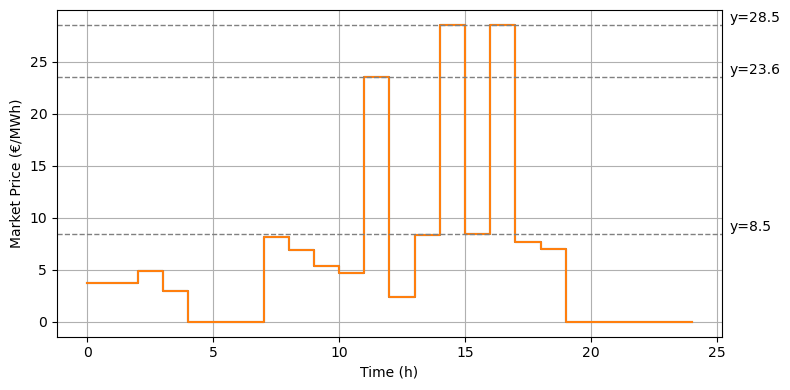

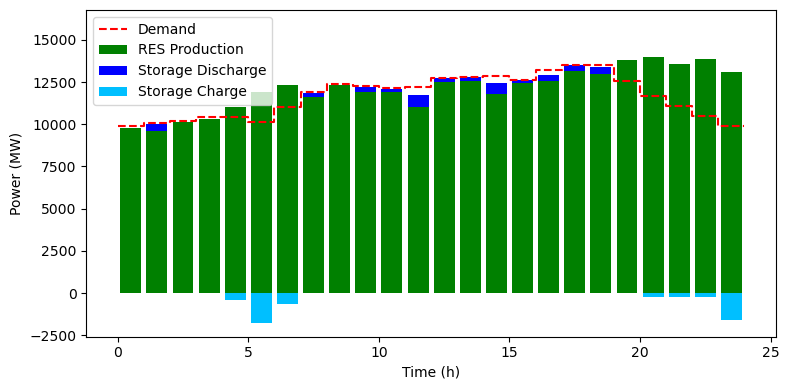

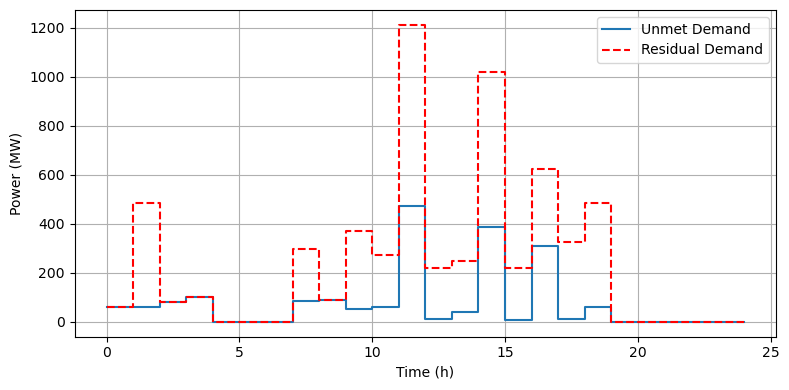

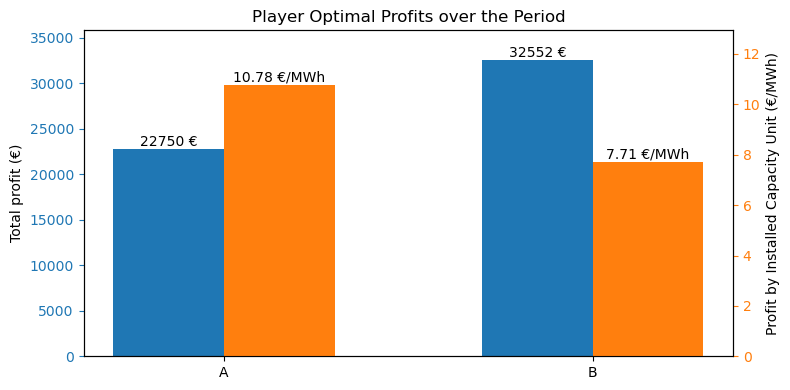

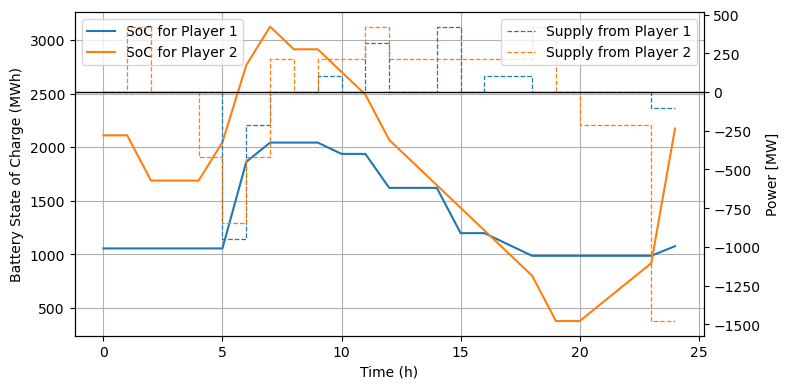

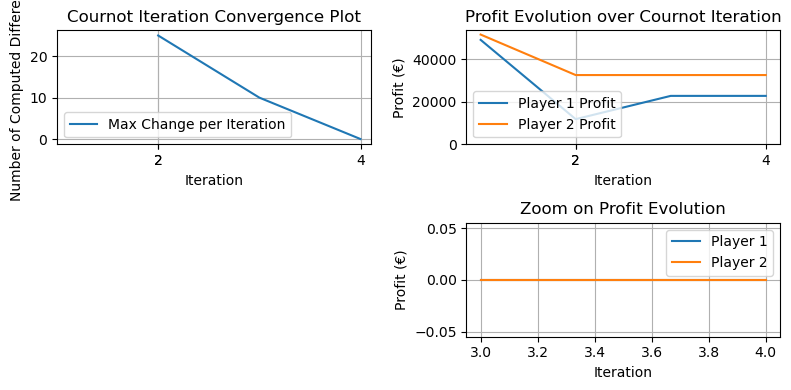

Running Summer - 2 players
  Player   OC   Eta   E_max   Q_max  \
0      A  0.5  0.85  3840.0  1920.0   
1      B  0.5  0.85  7680.0  3840.0   

                                             Q_steps  
0  [0.0, 192.0, 384.0, 576.0, 768.0, 960.0, 1152....  
1  [0.0, 384.0, 768.0, 1152.0, 1536.0, 1920.0, 23...  
Optimization was successful. It converged in 5 iterations.


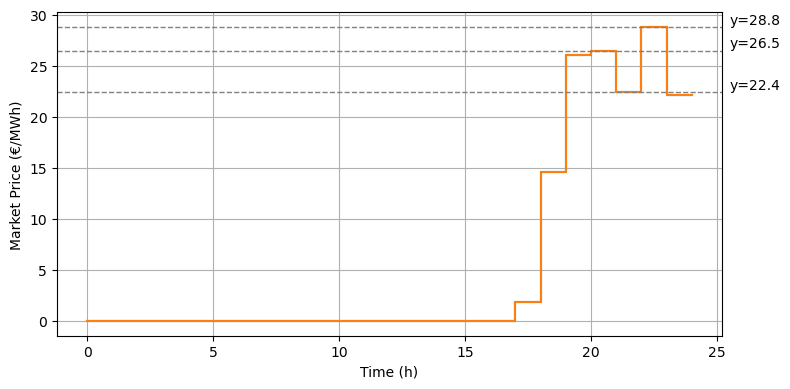

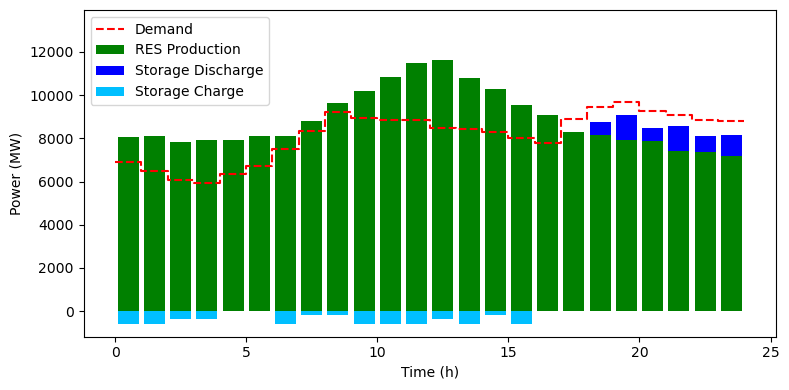

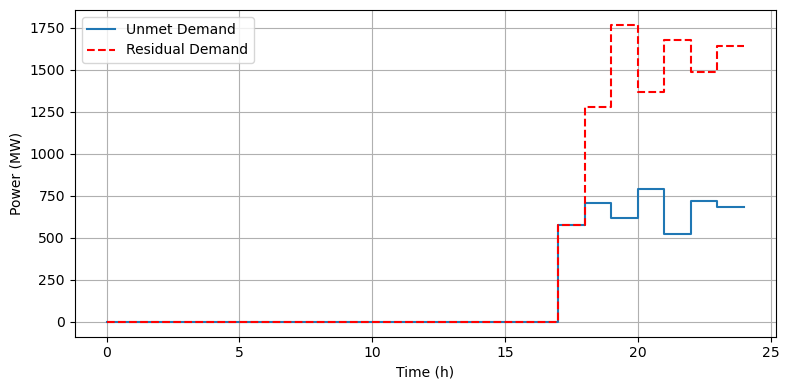

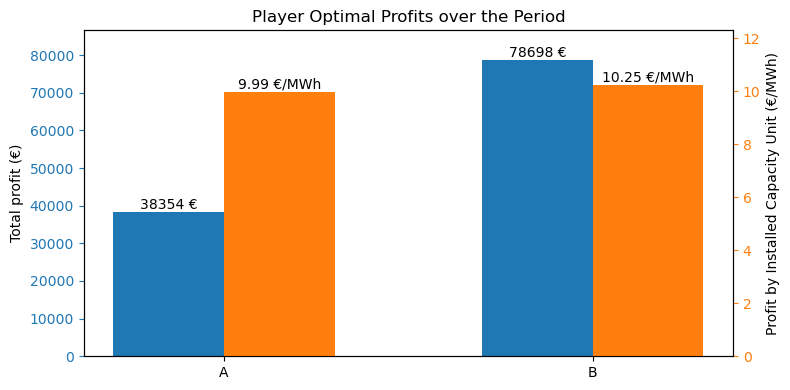

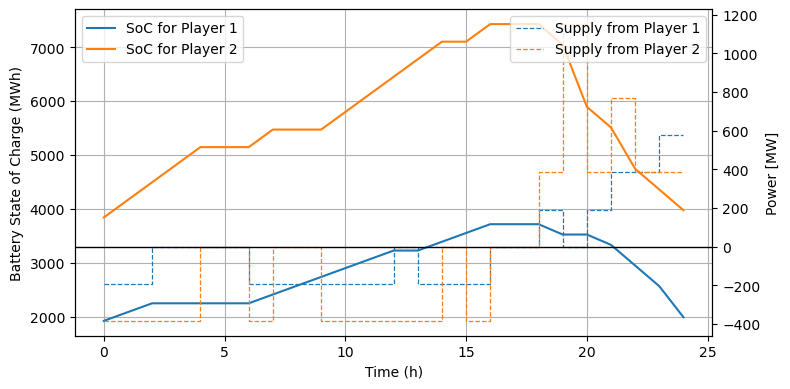

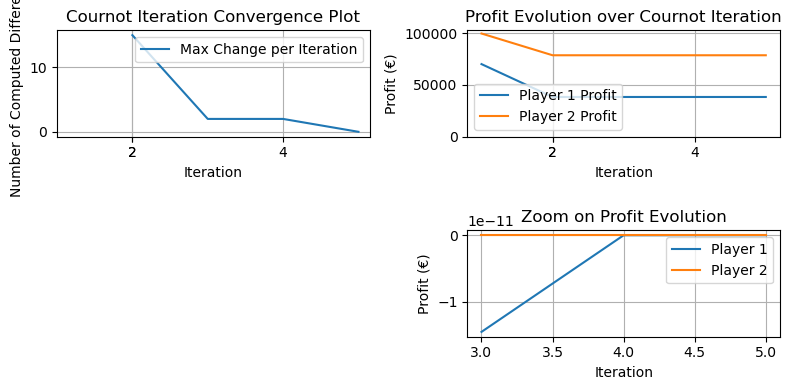

Running LowLoad - 2 players
  Player   OC   Eta   E_max   Q_max  \
0      A  0.5  0.85  3040.0  1523.0   
1      B  0.5  0.85  6090.0  3047.0   

                                             Q_steps  
0  [0.0, 152.3, 304.6, 456.9, 609.2, 761.5, 913.8...  
1  [0.0, 304.7, 609.4, 914.1, 1218.8, 1523.5, 182...  
Optimization was successful. It converged in 5 iterations.


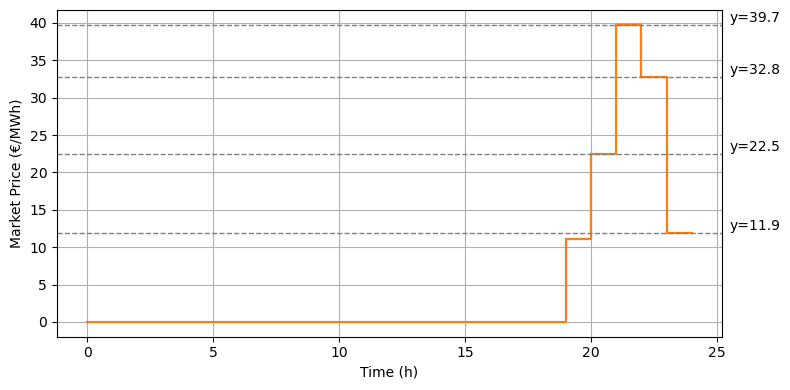

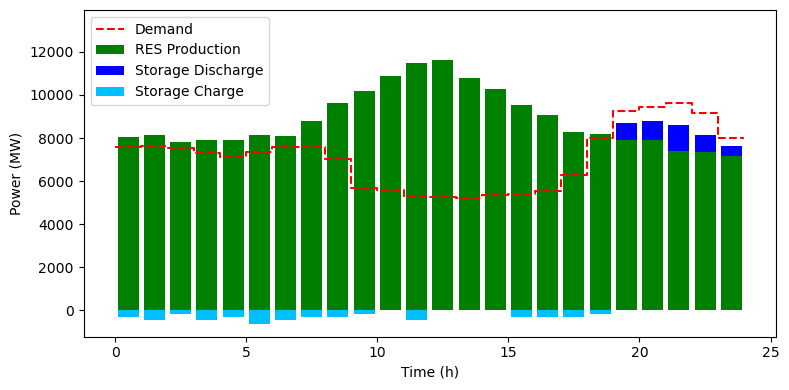

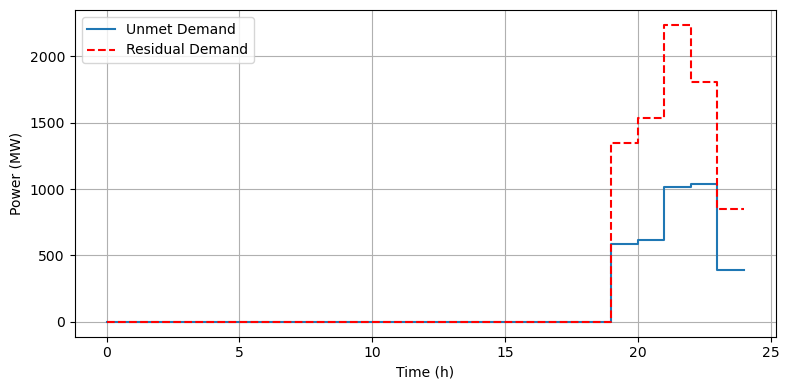

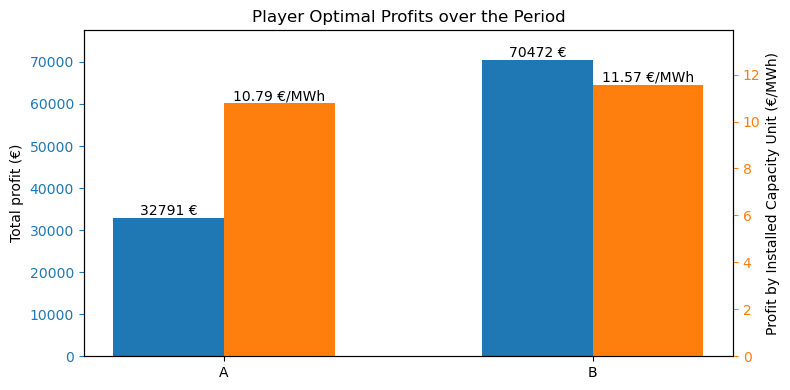

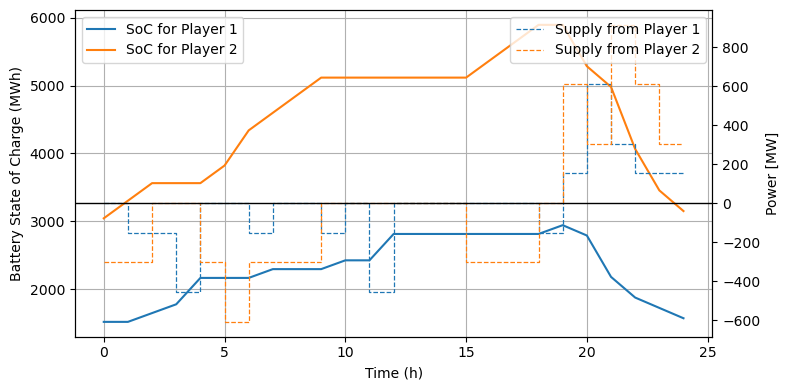

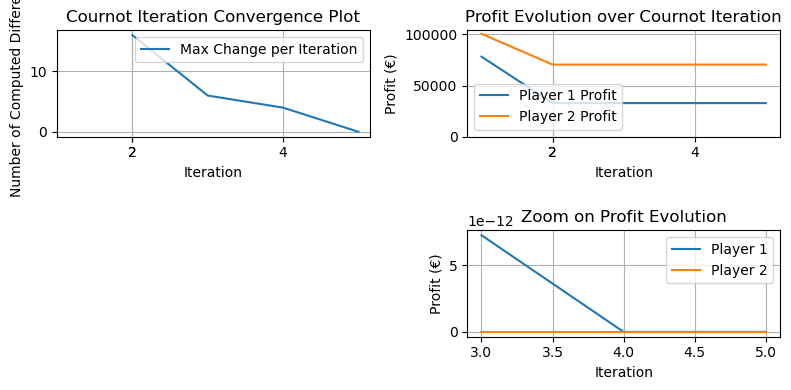

In [5]:
for season in seasons:
    results[season] = {}
    for n_players in player_counts:
        print(f"Running {season} - {n_players} players")
        output = main(season=season, n_players=n_players, save_plots=SAVE_FIGS, storage_capacity=storage_capacity)
        results[season][n_players] = output

In [6]:
TIME = range(24)
n_players = 2
for season in seasons:
    RES = load_res_production_data(season, plots=False)

    output = results[season][n_players]
    proad = [[output[player][1][t] - output[player][0][t] for t in TIME] for player in range(n_players)]
    proad_total = [sum(proad[player][t] for player in range(n_players)) for t in TIME]
    unmet_demand = output[0][9]
    residual_demand = [unmet_demand[t] + proad_total[t] for t in TIME]
    residual_demand = [r if r >= 0 else 0 for r in residual_demand]

    print(residual_demand)

    base_case_results = {
        "market_price": output[0][3],
        "RES": RES,
        "residual_demand": residual_demand,
        "unmet_demand": unmet_demand,
        "curtailed_prod": output[0][10],
        "storage_proad": proad_total,
        "P1_soc": output[0][2],
        "P2_soc": output[1][2]
    }
    base_case_df = pd.DataFrame(base_case_results)
    print(f"\n{season} scenario modeled for 2 storage players:\n", base_case_df)

    if SAVE_FIGS:
        base_case_df.to_csv(f"csv_basecase/{season}_results.csv")

[60.41707482640777, 484.7202597489762, 80.20998276233513, 101.56061439001678, 0, 0, 0, 295.8105192846735, 88.77370366815012, 368.839348436323, 273.65644391906534, 1211.4487866292977, 221.06447354643677, 249.68762978454396, 1019.6254382958045, 220.34609950247722, 624.7883929806346, 327.1821055611697, 484.204055425353, 0.0, 0, 0, 0, 0]

Winter scenario modeled for 2 storage players:
     market_price           RES  residual_demand  unmet_demand  curtailed_prod  \
0       3.778721   9809.887925        60.417075     60.417075        0.000000   
1       3.696672   9611.469740       484.720260     62.320260        0.000000   
2       4.898446  10107.555017        80.209983     80.209983        0.000000   
3       2.923140  10318.009386       101.560614    101.560614        0.000000   
4       0.000000  10995.852184         0.000000      0.000000      115.402184   
5       0.000000  11941.700235         0.000000      0.000000       32.365235   
6       0.000000  12336.445216         0.000000 